In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_rel
from collections import Counter

In [17]:
from scipy import stats
import numpy as np

def prueba_kolmogorov_smirnov(datos):
    # Normalizar los datos para comparar con la distribución normal estándar
    datos_norm = (datos - np.mean(datos)) / np.std(datos)
    estadistico, p_valor = stats.kstest(datos_norm, 'norm')
    print('Estadístico de Kolmogorov-Smirnov:', estadistico)
    print('Valor p:', p_valor)
    if p_valor > 0.05:
        print('Los datos parecen seguir una distribución normal (no se rechaza H0)\n')
    else:
        print('Los datos no siguen una distribución normal (se rechaza H0)\n')

def box_cox(data): #transformación depotencia   

    transformed_data, lambda_opt = stats.boxcox(data)
    return transformed_data, lambda_opt

In [4]:
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2) #Leer el excel 
# print(tabulate(df, headers='keys', tablefmt='github', showindex=True))
# Llenar valores nulos con la media
g = ['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4','Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4','T_Max1', 'T_Max2', 'T_Max3', 'T_Max4','T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']
for i in g: 
    df[i].fillna(df[i].mean(), inplace=True)
# print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

C:\Users\yamhile\AppData\Local\Temp\ipykernel_12652\4280992702.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [29]:
# Datos promedios de temperaturas en diferentes zonas 
columna1 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
columna2 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1)
columna3 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1)
columna4 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1)
# Datos de temperatura aveOral
list_1 = df['aveOralM']

In [16]:
#Normalidad 
prueba_kolmogorov_smirnov(columna1)
prueba_kolmogorov_smirnov(columna2)
prueba_kolmogorov_smirnov(columna3)
prueba_kolmogorov_smirnov(columna4)

Estadístico de Kolmogorov-Smirnov: 0.07421741434901097
Valor p: 2.4803405198095447e-05
Los datos no siguen una distribución normal (se rechaza H0)

Estadístico de Kolmogorov-Smirnov: 0.07024055768094739
Valor p: 8.048541420027933e-05
Los datos no siguen una distribución normal (se rechaza H0)

Estadístico de Kolmogorov-Smirnov: 0.1010036015073571
Valor p: 1.6396185863463394e-09
Los datos no siguen una distribución normal (se rechaza H0)

Estadístico de Kolmogorov-Smirnov: 0.05348777736188293
Valor p: 0.005620668604145939
Los datos no siguen una distribución normal (se rechaza H0)



Todos los datos son positivos.
Todos los datos son positivos.
Todos los datos son positivos.
Todos los datos son positivos.


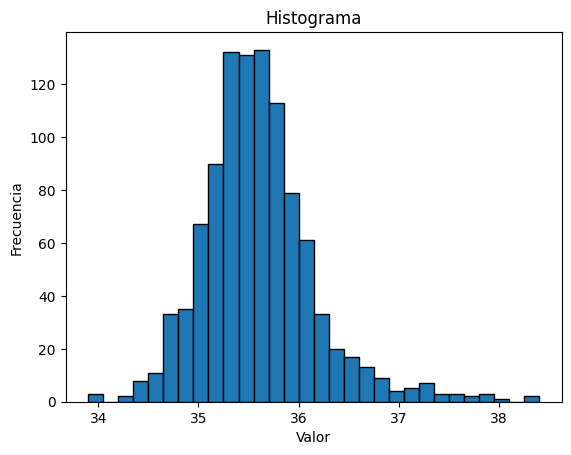

In [31]:
import numpy as np
d=[columna1,columna2,columna3,columna4]
for i in d:
    if np.all(i > 0):
        print("Todos los datos son positivos.")
    else:
        print("Hay valores cero o negativos.")

import matplotlib.pyplot as plt

plt.hist(columna1, bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
constante = 1000

# Sumar a cada columna individualmente
columna1_sumada = columna1 + constante
columna2_sumada = columna2 + constante
columna3_sumada = columna3 + constante
columna4_sumada = columna4 + constante
list_1_sumada   = list_1 + constante
prueba_kolmogorov_smirnov(columna1_sumada)

Estadístico de Kolmogorov-Smirnov: 0.07421741434895046
Valor p: 2.4803405198551994e-05
Los datos no siguen una distribución normal (se rechaza H0)

